#1. Librerías y cargue de archivo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install scikit-plot
import scikitplot as skplt
%matplotlib inline

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor # Multi-Layer Perceptron para Regresión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptron para Regresión
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

#set up graphic style in this case I am using the color scheme from xkcd.com
#rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Clase 0","Clase 1"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y,normalize='true')
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv("Dataset_With_Classes.csv", sep=';')
display(data)

,Edad en Meses,Meses Lactancia Materna Exclusiva,Meses Lactancia Materna Total,Peso,Talla,Sisben,Nombre del Servicio_DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR,Nombre del Servicio_HOGARES INFANTILES - INSTITUCIONAL,Tipo Documento Beneficiario_SIN DOCUMENTO,Sexo_Mujer,...,Estado IMC_sobrepeso,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN ESPECIAL,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN SUBSIDIADO,¿En el sistema general de seguridad social en salud usted es?_NO AFILIADO(A),¿El beneficiario cuenta con el carnet de vacunación?_S,¿El carnet de vacunación se encuentra al día en las vacunas y dosis que corresponden a la edad del niño o niña?_SI,El beneficiario cuenta con Carnet de Crecimiento y Desarrollo_SI,Estado_VINCULADO,Talla inferior última toma_SI,Clases
0,12,7,7,10.0,73.0,4.0,1,0,0,1,...,0,0,1,0,1,1,1,1,0,1
1,1,1,1,6.2,58.0,1.0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,1
2,58,6,18,14.3,99.6,1.0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
3,61,6,18,15.5,102.1,1.0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
4,0,0,0,3.8,50.0,1.0,1,0,1,1,...,0,0,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,52,6,18,13.6,100.8,1.0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
3557,56,6,18,14.6,102.5,1.0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
3558,13,8,8,10.0,72.0,1.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3559,53,6,14,15.0,101.0,1.0,0,1,1,1,...,0,0,0,1,1,1,1,1,0,0


# 2. Preparación de datos

In [ ]:
count_Clases=data.Clases.value_counts()
count_Clases

0    2210
1    1351
Name: Clases, dtype: int64

Por cada elemento de la clase 1 hay 1,636 de la clase 0

In [ ]:
data_nuevo=data.drop(['Clases'],axis=1)

In [ ]:
display(data_nuevo)

,Edad en Meses,Meses Lactancia Materna Exclusiva,Meses Lactancia Materna Total,Peso,Talla,Sisben,Nombre del Servicio_DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR,Nombre del Servicio_HOGARES INFANTILES - INSTITUCIONAL,Tipo Documento Beneficiario_SIN DOCUMENTO,Sexo_Mujer,...,Estado IMC__,Estado IMC_sobrepeso,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN ESPECIAL,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN SUBSIDIADO,¿En el sistema general de seguridad social en salud usted es?_NO AFILIADO(A),¿El beneficiario cuenta con el carnet de vacunación?_S,¿El carnet de vacunación se encuentra al día en las vacunas y dosis que corresponden a la edad del niño o niña?_SI,El beneficiario cuenta con Carnet de Crecimiento y Desarrollo_SI,Estado_VINCULADO,Talla inferior última toma_SI
0,12,7,7,10.0,73.0,4.0,1,0,0,1,...,0,0,0,1,0,1,1,1,1,0
1,1,1,1,6.2,58.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,58,6,18,14.3,99.6,1.0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
3,61,6,18,15.5,102.1,1.0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
4,0,0,0,3.8,50.0,1.0,1,0,1,1,...,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,52,6,18,13.6,100.8,1.0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
3557,56,6,18,14.6,102.5,1.0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
3558,13,8,8,10.0,72.0,1.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3559,53,6,14,15.0,101.0,1.0,0,1,1,1,...,0,0,0,0,1,1,1,1,1,0


In [ ]:
data_nuevo.columns

Index(['Edad en Meses', 'Meses Lactancia Materna Exclusiva',
       'Meses Lactancia Materna Total', 'Peso', 'Talla', 'Sisben',
       'Nombre del Servicio_DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR',
       'Nombre del Servicio_HOGARES INFANTILES - INSTITUCIONAL',
       'Tipo Documento Beneficiario_SIN DOCUMENTO', 'Sexo_Mujer',
       'País de Nacimiento_Venezuela', 'Grupo Edad_Grupo2',
       'Grupo Edad_Grupo3', 'Grupo Étnico_INDIGENA',
       'Grupo Étnico_NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES',
       'Estado Talla Edad_Retraso en talla',
       'Estado Talla Edad_Riesgo de baja talla',
       'Estado Talla Edad_Talla adecuada para la edad',
       'Estado Peso Edad_Desnutricion global severa',
       'Estado Peso Edad_Grande para la edad Gestacional',
       'Estado Peso Edad_No Aplica',
       'Estado Peso Edad_Peso adecuado para la edad',
       'Estado Peso Edad_Riesgo de peso bajo para la edad',
       'Estado Peso Talla_Desnutricion aguda severa

##Escalar variables usando método MinMaxScaler

In [ ]:
MM = MinMaxScaler(feature_range=(0, 1))
data_nuevo_MM = MM.fit_transform(data_nuevo)
data_nuevo_MM = pd.DataFrame(data_nuevo_MM, columns = ['Edad en Meses', 'Meses Lactancia Materna Exclusiva',
       'Meses Lactancia Materna Total', 'Peso', 'Talla', 'Sisben',
       'Nombre del Servicio_DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR',
       'Nombre del Servicio_HOGARES INFANTILES - INSTITUCIONAL',
       'Tipo Documento Beneficiario_SIN DOCUMENTO', 'Sexo_Mujer',
       'País de Nacimiento_Venezuela', 'Grupo Edad_Grupo2',
       'Grupo Edad_Grupo3', 'Grupo Étnico_INDIGENA',
       'Grupo Étnico_NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES',
       'Estado Talla Edad_Retraso en talla',
       'Estado Talla Edad_Riesgo de baja talla',
       'Estado Talla Edad_Talla adecuada para la edad',
       'Estado Peso Edad_Desnutricion global severa',
       'Estado Peso Edad_Grande para la edad Gestacional',
       'Estado Peso Edad_No Aplica',
       'Estado Peso Edad_Peso adecuado para la edad',
       'Estado Peso Edad_Riesgo de peso bajo para la edad',
       'Estado Peso Talla_Desnutricion aguda severa',
       'Estado Peso Talla_Obesidad',
       'Estado Peso Talla_Peso adecuado para la talla',
       'Estado Peso Talla_Riesgo de Sobrepeso',
       'Estado Peso Talla_Riesgo de desnutrición aguda',
       'Estado Peso Talla_Sobrepeso', 'Estado Peso Talla__',
       'Estado IMC_Delgadez', 'Estado IMC_Obesidad',
       'Estado IMC_Riesgo de Sobrepeso', 'Estado IMC_Riesgo para la delgadez',
       'Estado IMC_Sobrepeso', 'Estado IMC__', 'Estado IMC_sobrepeso',
       '¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN ESPECIAL ',
       '¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN SUBSIDIADO',
       '¿En el sistema general de seguridad social en salud usted es?_NO AFILIADO(A)',
       '¿El beneficiario cuenta con el carnet de vacunación?_S',
       '¿El carnet de vacunación se encuentra al día en las vacunas y dosis que corresponden a la edad del niño o niña?_SI',
       'El beneficiario cuenta con Carnet de Crecimiento y Desarrollo_SI',
       'Estado_VINCULADO', 'Talla inferior última toma_SI'])
display(data_nuevo_MM)

,Edad en Meses,Meses Lactancia Materna Exclusiva,Meses Lactancia Materna Total,Peso,Talla,Sisben,Nombre del Servicio_DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR,Nombre del Servicio_HOGARES INFANTILES - INSTITUCIONAL,Tipo Documento Beneficiario_SIN DOCUMENTO,Sexo_Mujer,...,Estado IMC__,Estado IMC_sobrepeso,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN ESPECIAL,¿En el sistema general de seguridad social en salud usted es?_AFILIADO REGIMEN SUBSIDIADO,¿En el sistema general de seguridad social en salud usted es?_NO AFILIADO(A),¿El beneficiario cuenta con el carnet de vacunación?_S,¿El carnet de vacunación se encuentra al día en las vacunas y dosis que corresponden a la edad del niño o niña?_SI,El beneficiario cuenta con Carnet de Crecimiento y Desarrollo_SI,Estado_VINCULADO,Talla inferior última toma_SI
0,0.184615,0.875,0.145833,0.275362,0.393140,0.057692,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.015385,0.125,0.020833,0.137681,0.195251,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.892308,0.750,0.375000,0.431159,0.744063,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.938462,0.750,0.375000,0.474638,0.777045,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.000000,0.000,0.000000,0.050725,0.089710,0.000000,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,0.800000,0.750,0.375000,0.405797,0.759894,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3557,0.861538,0.750,0.375000,0.442029,0.782322,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3558,0.200000,1.000,0.166667,0.275362,0.379947,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3559,0.815385,0.750,0.291667,0.456522,0.762533,0.000000,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


#3. Creación de modelo con Regresión Logística

**Generación del modelo**

In [ ]:
X = np.array(data_nuevo_MM)
y = np.array(data['Clases'])
X.shape

(3561, 45)

In [ ]:
validation_size = 0.30
seed = 17
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_validation)
print(predictions[0:15])

[1 1 0 0 0 0 1 0 1 0 1 0 1 0 1]


In [ ]:
model.score(X_train,Y_train)

0.9755216693418941

**Evaluación del modelo**

In [ ]:
#Métrica de exactitud
Puntaje = accuracy_score(Y_validation, predictions)
Puntaje

0.9784845650140318

In [ ]:
#Métrica de balanceo
Puntaje2 = balanced_accuracy_score(Y_validation, predictions)
Puntaje2

0.9819527476734597

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)
Puntaje3 =  f1_score(Y_validation, predictions, average='weighted')
Puntaje3

0.9785736021164048

In [ ]:
Puntaje4 = roc_auc_score(Y_validation, predictions)

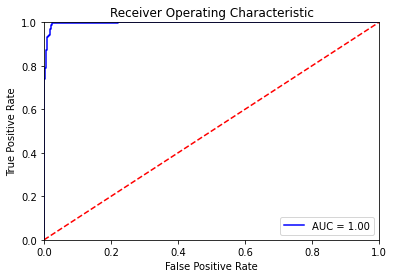

In [ ]:
#Métrica de sensibilidad y especificidad

import sklearn.metrics as metrics
from plotnine import ggplot
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
metricas_regresion = [Puntaje, Puntaje2, Puntaje3, Puntaje4]

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.976627 (0.014010)


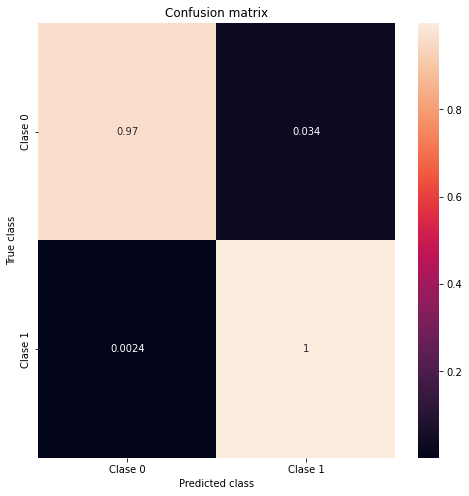

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       653
           1       0.95      1.00      0.97       416

    accuracy                           0.98      1069
   macro avg       0.97      0.98      0.98      1069
weighted avg       0.98      0.98      0.98      1069



In [ ]:
pred_y_logit = model.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_logit)

#4. Creación de modelo con arboles de decisión

**Generación del modelo**

In [ ]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1.6})
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model_tree_decision = tree_model.fit(X = f_train.drop(['Clases'], axis=1), 
                               y = f_train["Clases"]) 
        valid_acc = model_tree_decision.score(X = f_valid.drop(['Clases'], axis=1), 
                                y = f_valid["Clases"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.982306
         2          0.982306
         3          0.982868
         4          0.986519
         5          0.987923
         6          0.986799
         7          0.986799
         8          0.986799
         9          0.986799
        10          0.986799
        11          0.986799
        12          0.986799
        13          0.986799
        14          0.986799
        15          0.986799
        16          0.986799
        17          0.986799
        18          0.986799
        19          0.986799
        20          0.986799
        21          0.986799
        22          0.986799
        23          0.986799
        24          0.986799
        25          0.986799
        26          0.986799
        27          0.986799
        28          0.986799
        29          0.986799
        30          0.986799
        31          0.986799
        32          0.986799
        33          0.986799
        34    

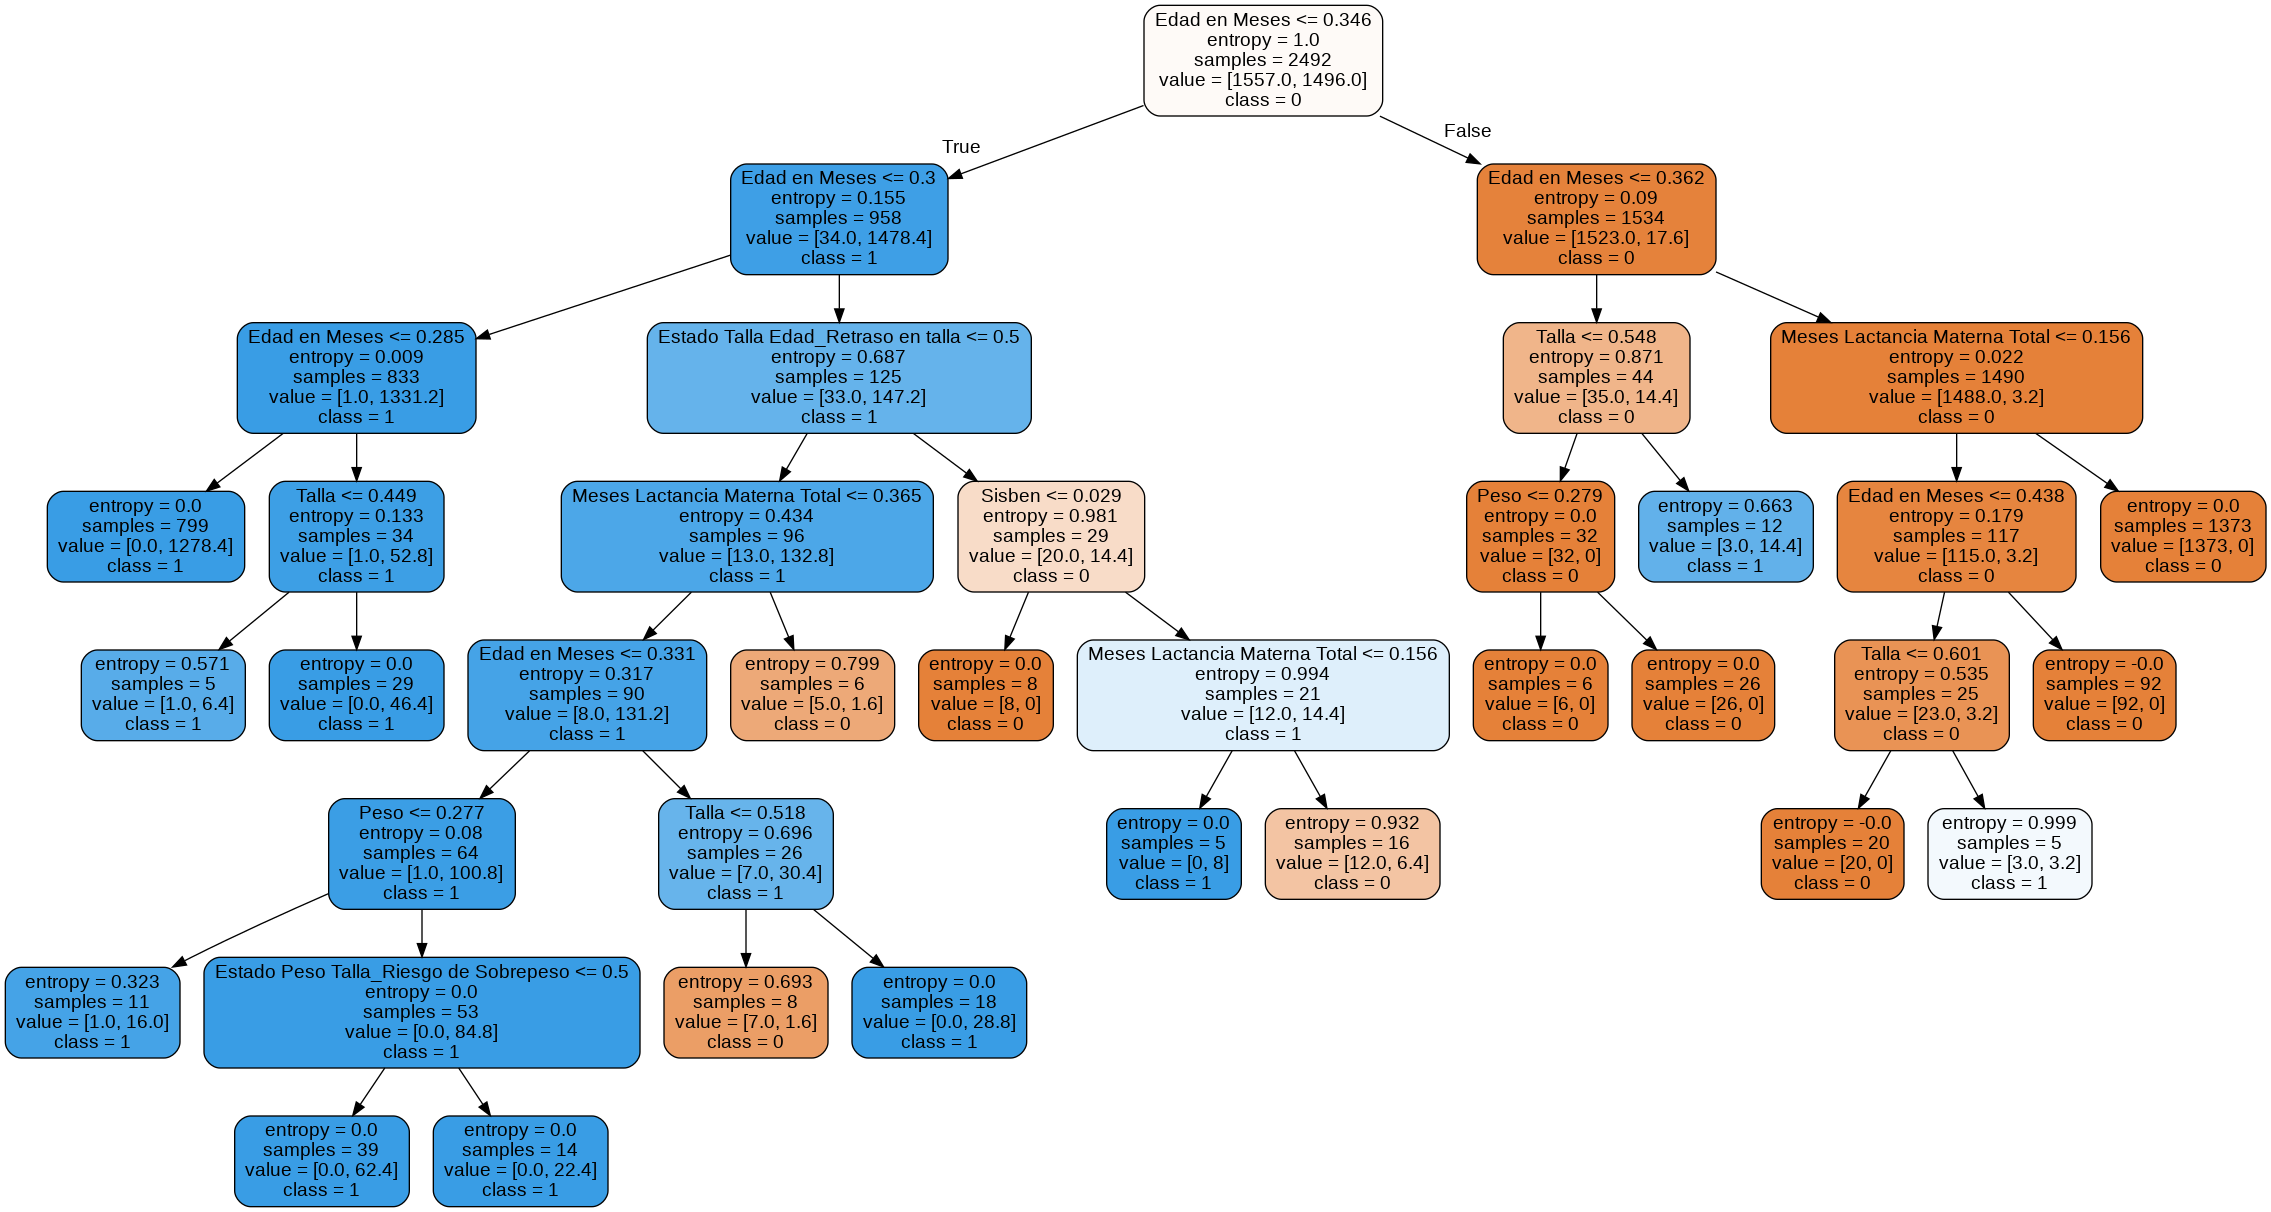

In [ ]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = data['Clases']
x_train = data.drop(['Clases'], axis=1).values 

# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 15,
                                            class_weight={1:1.6})
decision_tree.fit(X_train, Y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data.drop(['Clases'], axis=1)),
                              class_names = ['0', '1'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

**Evaluación del modelo**

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

64.45


In [ ]:
predictions_tree = decision_tree.predict(X_validation)

In [ ]:
#Métrica de exactitud
from sklearn.metrics import accuracy_score
Puntaje = accuracy_score(Y_validation, predictions_tree)
Puntaje

0.9869036482694107

In [ ]:
#Métrica de balanceo
from sklearn.metrics import balanced_accuracy_score
Puntaje2 = balanced_accuracy_score(Y_validation, predictions_tree)
Puntaje2

0.9853542083873248

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)
from sklearn.metrics import f1_score
Puntaje3 =  f1_score(Y_validation, predictions_tree, average='weighted')
Puntaje3

0.9868920089997011

In [ ]:
Puntaje4 = roc_auc_score(Y_validation, predictions_tree)

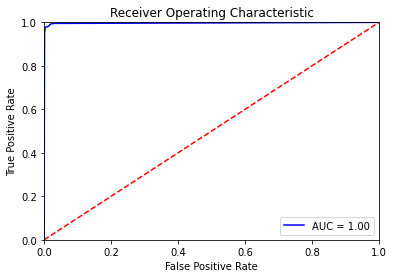

In [ ]:
#Curva ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = decision_tree.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
metricas_arbol = [Puntaje, Puntaje2, Puntaje3, Puntaje4]

In [ ]:
name='Decision tree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(decision_tree, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Decision tree: 0.982234 (0.016424)


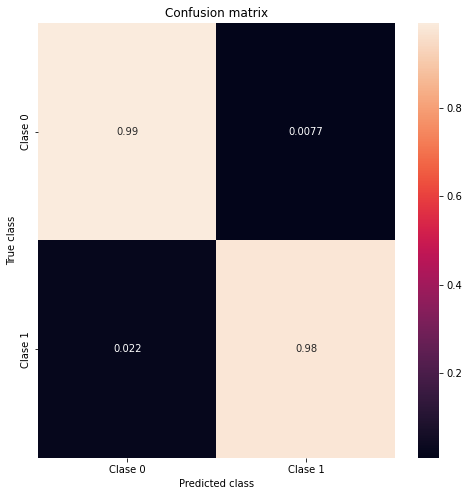

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       653
           1       0.99      0.98      0.98       416

    accuracy                           0.99      1069
   macro avg       0.99      0.99      0.99      1069
weighted avg       0.99      0.99      0.99      1069



In [ ]:
pred_y_tree = decision_tree.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_tree)

#5. Creación de modelo con Random Forest

##5.1 Bosque Aleatorio 1

**Generacion del modelo**

In [ ]:
# Crear el modelo con 100 arboles
model_random_forest = RandomForestClassifier(n_estimators=100,
                               criterion='gini', 
                               bootstrap = True,
                               verbose=2,
                               max_features = 'sqrt',
                               class_weight={1:1.6})
# entrenar!
model_random_forest.fit(X_train, Y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(class_weight={1: 1.6}, max_features='sqrt', verbose=2)

**Evaluación del modelo**

In [ ]:
predictions_forest = model_random_forest.predict(X_validation)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
#Métrica de exactitud
from sklearn.metrics import accuracy_score
Puntaje = accuracy_score(Y_validation, predictions_forest)
Puntaje

0.9915809167446211

In [ ]:
#Métrica de balanceo
from sklearn.metrics import balanced_accuracy_score
Puntaje2 = balanced_accuracy_score(Y_validation, predictions_forest)
Puntaje2

0.9922362763576393

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)
from sklearn.metrics import f1_score
Puntaje3 =  f1_score(Y_validation, predictions_forest, average='weighted')
Puntaje3

0.991589885249297

In [ ]:
Puntaje4 = roc_auc_score(Y_validation, predictions_forest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


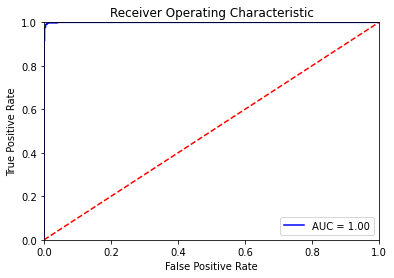

In [ ]:
#Curva ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_random_forest.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
metricas_random = [Puntaje, Puntaje2, Puntaje3, Puntaje4]

In [ ]:
name='Random Forest'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_random_forest, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 5

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


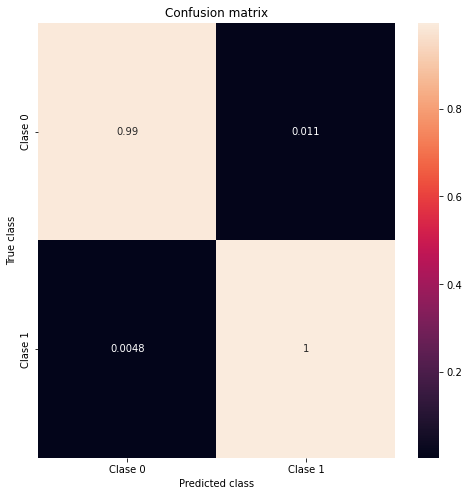

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       653
           1       0.98      1.00      0.99       416

    accuracy                           0.99      1069
   macro avg       0.99      0.99      0.99      1069
weighted avg       0.99      0.99      0.99      1069



In [ ]:
pred_y_forest = model_random_forest.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_forest)

##5.2 Bosque Aleatorio 2

**Generación del modelo**

In [ ]:
# otro modelo, variando hiperparámetros
model_random_forest2 = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model_random_forest2.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='sqrt', oob_score=True, random_state=50,
                       verbose=2)

**Evaluación del modelo**

In [ ]:
predictions_forest2 = model_random_forest.predict(X_validation)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
#Métrica de exactitud

Puntaje = accuracy_score(Y_validation, predictions_forest2)
Puntaje

0.9915809167446211

In [ ]:
#Métrica de balanceo

Puntaje2 = balanced_accuracy_score(Y_validation, predictions_forest2)
Puntaje2

0.9922362763576393

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)

puntaje3 =  f1_score(Y_validation, predictions_forest2, average='weighted')
puntaje3

0.991589885249297

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


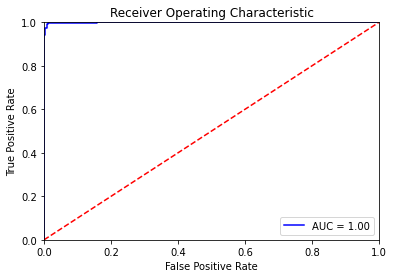

In [ ]:
#Curva ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_random_forest2.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
name='Random Forest 2'
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model_random_forest2, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Random Forest 2: 0.982225 (0.003502)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


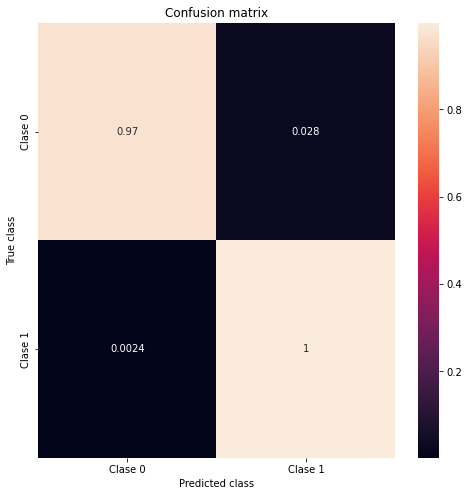

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       653
           1       0.96      1.00      0.98       416

    accuracy                           0.98      1069
   macro avg       0.98      0.99      0.98      1069
weighted avg       0.98      0.98      0.98      1069



In [ ]:
pred_y_forest2 = model_random_forest2.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_forest2)

#6. Creación de modelo con SVM

**Generación del modelo**

In [ ]:
import matplotlib
X=X_train
y=Y_train
# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
model_svm = svm.SVC(kernel='linear', C=100, class_weight={1:1.6},probability=True).fit(X, y)


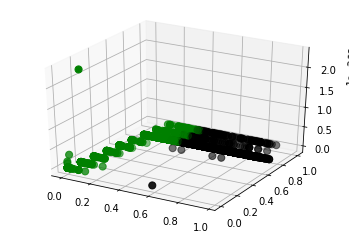

In [ ]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 100
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)

**Evaluación del modelo**

In [ ]:
predictions_svm = model_svm.predict(X_validation)

In [ ]:
#Métrica de exactitud

Puntaje = accuracy_score(Y_validation, predictions_svm)
Puntaje

0.9953227315247896

In [ ]:
#Métrica de balanceo

Puntaje2 = balanced_accuracy_score(Y_validation, predictions_svm)
Puntaje2

0.9957352897867828

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)

Puntaje3 =  f1_score(Y_validation, predictions_svm, average='weighted')
Puntaje3

0.9953257493808375

In [ ]:
Puntaje4 = roc_auc_score(Y_validation, predictions_svm)

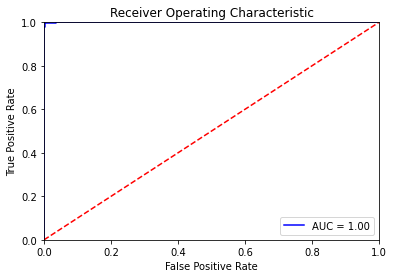

In [ ]:
#Curva ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_svm.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
metricas_svm = [Puntaje, Puntaje2, Puntaje3, Puntaje4]

In [ ]:
name='Model SVM'
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model_svm, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Model SVM: 0.985038 (0.007470)


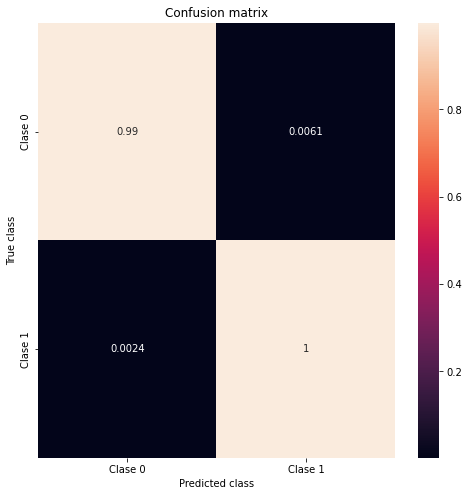

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       653
           1       0.99      1.00      0.99       416

    accuracy                           1.00      1069
   macro avg       0.99      1.00      1.00      1069
weighted avg       1.00      1.00      1.00      1069



In [ ]:
pred_y_svm = model_svm.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_svm)

#7. Creación de Modelo con Red Neuronal

**Generación del modelo**

In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes=100, 
                                 activation='relu',
                                solver='sgd',
                                 learning_rate='constant',
                                 max_iter=1000)
model_mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, solver='sgd')

**Evaluación del modelo**

In [ ]:
predictions_mlp = model_mlp.predict(X_validation)

In [ ]:
#Métrica de exactitud

Puntaje = accuracy_score(Y_validation, predictions_mlp)
Puntaje

0.980355472404116

In [ ]:
#Métrica de balanceo

Puntaje2 = balanced_accuracy_score(Y_validation, predictions_mlp)
Puntaje2

0.9830479149487572

In [ ]:
#Métrica de análisis de balance (Precisión-Memorización)

Puntaje3 =  f1_score(Y_validation, predictions_mlp, average='weighted')
Puntaje3

0.9804226079592104

In [ ]:
Puntaje4 = roc_auc_score(Y_validation, predictions_mlp)

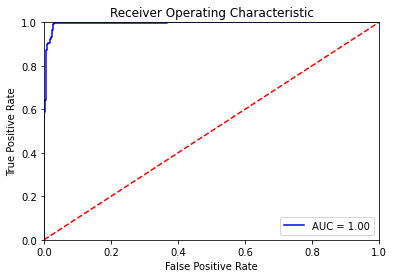

In [ ]:
#Curva ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_mlp.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
metricas_redneuronal = [Puntaje, Puntaje2, Puntaje3, Puntaje4]

In [ ]:
name='Model Red Neuronal'
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model_mlp, X_validation, Y_validation, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Model Red Neuronal: 0.976618 (0.006596)


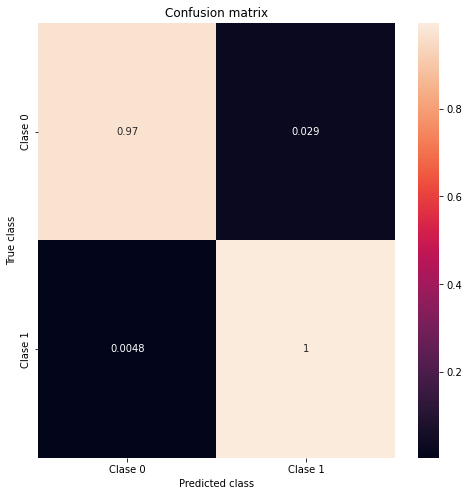

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       653
           1       0.96      1.00      0.98       416

    accuracy                           0.98      1069
   macro avg       0.98      0.98      0.98      1069
weighted avg       0.98      0.98      0.98      1069



In [ ]:
pred_y_mlp = model_mlp.predict(X_validation)
mostrar_resultados(Y_validation, pred_y_mlp)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


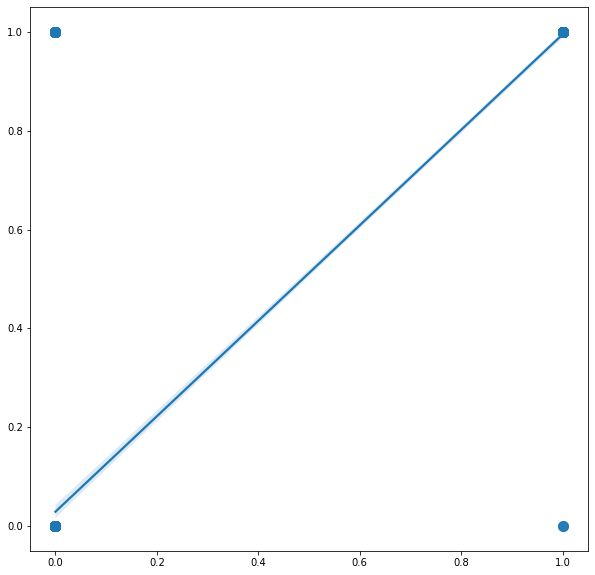

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(Y_validation, predictions_mlp, fit_reg=True, scatter_kws={"s": 100})

#8. Elección de modelo definitivo

In [ ]:
nombre_metricas=['Precisión','Precisión Balanceada','F1 Score', 'AUC Score']

data = {'Métrica': nombre_metricas, 'Regresión Logistica': metricas_regresion, 'Arbol de Decisión':metricas_arbol, 'Random Forest':metricas_random, 'Maquina de Soporte Vectorial':metricas_svm, 'Clasificador MLP':metricas_redneuronal}
metricas_score = pd.DataFrame(data=data)
display(metricas_score)

,Métrica,Regresión Logistica,Arbol de Decisión,Random Forest,Maquina de Soporte Vectorial,Clasificador MLP
0,Precisión,0.978485,0.986904,0.991581,0.995323,0.980355
1,Precisión Balanceada,0.981953,0.985354,0.992236,0.995735,0.983048
2,F1 Score,0.978574,0.986892,0.991590,0.995326,0.980423
3,AUC Score,0.981953,0.985354,0.992236,0.995735,0.983048


#9. Exportando el modelo

In [ ]:
from joblib import dump, load # almacenar modelos y cargar modelos



In [ ]:
dump(model_svm.fit(X_train, Y_train), 'modelo_icbf.joblib')

['modelo_icbf.joblib']

In [ ]:
Datos_Nuevos = pd.read_csv('DatosNuevos.csv', sep=';')

In [ ]:
Datos_Nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 46 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Edad en Meses                                                                                                       100 non-null    int64  
 1   Meses Lactancia Materna Exclusiva                                                                                   100 non-null    int64  
 2   Meses Lactancia Materna Total                                                                                       100 non-null    int64  
 3   Peso                                                                                                                100 non-null    float64
 4   Talla                

In [ ]:
real_clases = Datos_Nuevos['Clases']
del Datos_Nuevos['Clases']

In [ ]:
modelopredictivo = load('modelo_icbf.joblib') 
#Aqui se cargan los nuevos datos, EXACTAMENTE en el mismo orden y la misma magnitud
class_predicted = modelopredictivo.predict(Datos_Nuevos)

print("Clase = ", class_predicted)

Clase =  [0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Puntaje = accuracy_score(real_clases, class_predicted)
print(Puntaje)

0.96


In [ ]:
Puntaje2 = balanced_accuracy_score(real_clases, class_predicted)
print(Puntaje2)

0.9259259259259259


In [ ]:
Puntaje3 = f1_score(real_clases, class_predicted, average='weighted')
print(Puntaje3)

0.9589333333333333


In [ ]:
Puntaje4 = roc_auc_score(real_clases, class_predicted)
print(Puntaje4)

0.9259259259259259
